In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
conn = sqlite3.connect("sales_data_new.db")
cursor = conn.cursor()

In [6]:
cursor.execute("DROP TABLE IF EXISTS sales_data")

In [28]:
cursor.execute('''
CREATE TABLE sales_data_new (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')
conn.commit()

In [30]:
print("Database and table created successfully!")

Database and table created successfully!


In [32]:
sales_data = [
    ('Laptop', 5, 800),
    ('Laptop', 3, 800),
    ('Headphones', 10, 50),
    ('Headphones', 4, 50),
    ('Keyboard', 7, 30),
    ('Keyboard', 7, 30),
    ('Mouse', 12, 20),
    ('Mouse', 12, 20)
]

In [36]:
cursor.executemany(
    "INSERT INTO sales_data_new (product, quantity, price) VALUES (?, ?, ?)", 
    sales_data
)
conn.commit()

In [38]:
print("Sample data inserted successfully!")

Sample data inserted successfully!


In [40]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales_data_new
GROUP BY product
"""

In [42]:
df_summary = pd.read_sql_query(query, conn)
print("\nSales Summary:")
print(df_summary)


Sales Summary:
      product  total_qty  revenue
0  Headphones         14    700.0
1    Keyboard         14    420.0
2      Laptop          8   6400.0
3       Mouse         24    480.0


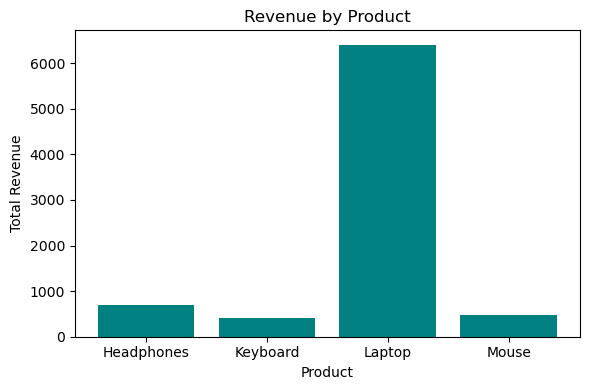

In [44]:
plt.figure(figsize=(6,4))
plt.bar(df_summary['product'], df_summary['revenue'], color='teal')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

In [46]:
plt.savefig("sales_data_new__chart.png")
print("\nChart saved as 'sales_data_new_chart.png'")


Chart saved as 'sales_data_new_chart.png'


<Figure size 640x480 with 0 Axes>

In [48]:
conn.close()
print("\nDatabase connection closed successfully!")


Database connection closed successfully!
